# Ettom.Srinija - 221710310015

# Suicide Rates Prediction:

## PROBLEM STATEMENT:
To Predict the Rate of suicides using various Machine Learning Algorithms Using various factors such as a person’s age, sex, Generation also based on the country’s population.  


## DATA SET DESCRIPTION: 
The given data set consists of the following parameters:
1.	Country
2.	Year
3.	Sex: Gender
4.	Age: Range (Ex:15-24 years)
5.	Suicides_no: Number of Suicides committed
6.	Population
7.	Suicides_hk: Sucicides per 100k population
8.	Generation: (Ex: Silent, Boomers)


### Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import matplotlib
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

### Checking Versions of the Packages:

In [2]:
print(np.__version__)  #numpy
print(pd.__version__)  #pandas
print(sns.__version__)  #seaborn
print(sklearn.__version__) #sklearn
print(matplotlib.__version__)  #matplotlib
print(msno.__version__) #missingno

1.17.2
0.25.1
0.9.0
0.21.3
3.2.2
0.4.2


### Reading the Dataset:

In [3]:
df=pd.read_csv("master.csv")
df.head(10)

,country,year,sex,age,suicides_no,population,suicides_hk,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Generation X


### Data Visualization:

In [4]:
df.shape

(27820, 8)

In [5]:
df.describe()

,year,suicides_no,population,suicides_hk
count,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097
std,8.469055,902.047917,3.911779e+06,18.961511
min,1985.000000,0.000000,2.780000e+02,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000
50%,2002.000000,25.000000,4.301500e+05,5.990000
75%,2008.000000,131.000000,1.486143e+06,16.620000
max,2016.000000,22338.000000,4.380521e+07,224.970000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
country        27820 non-null object
year           27820 non-null int64
sex            27820 non-null object
age            27820 non-null object
suicides_no    27820 non-null int64
population     27820 non-null int64
suicides_hk    27820 non-null float64
generation     27820 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ MB


In [7]:
df.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
suicides_hk    0
generation     0
dtype: int64

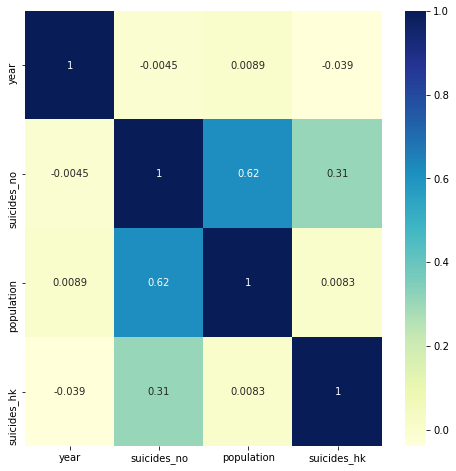

In [8]:
## visualizing the correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

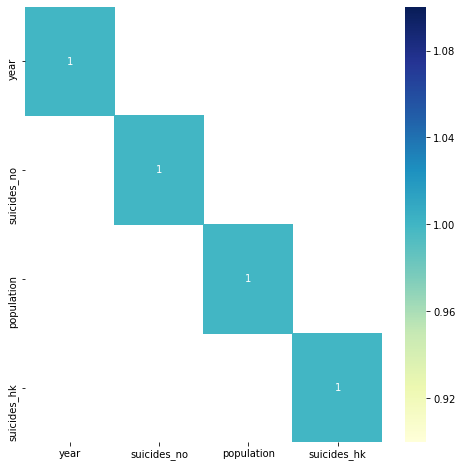

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr()[df.corr()>0.7],annot=True,cmap="YlGnBu")

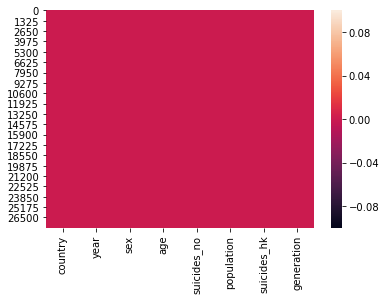

In [10]:
sns.heatmap(df.isna())

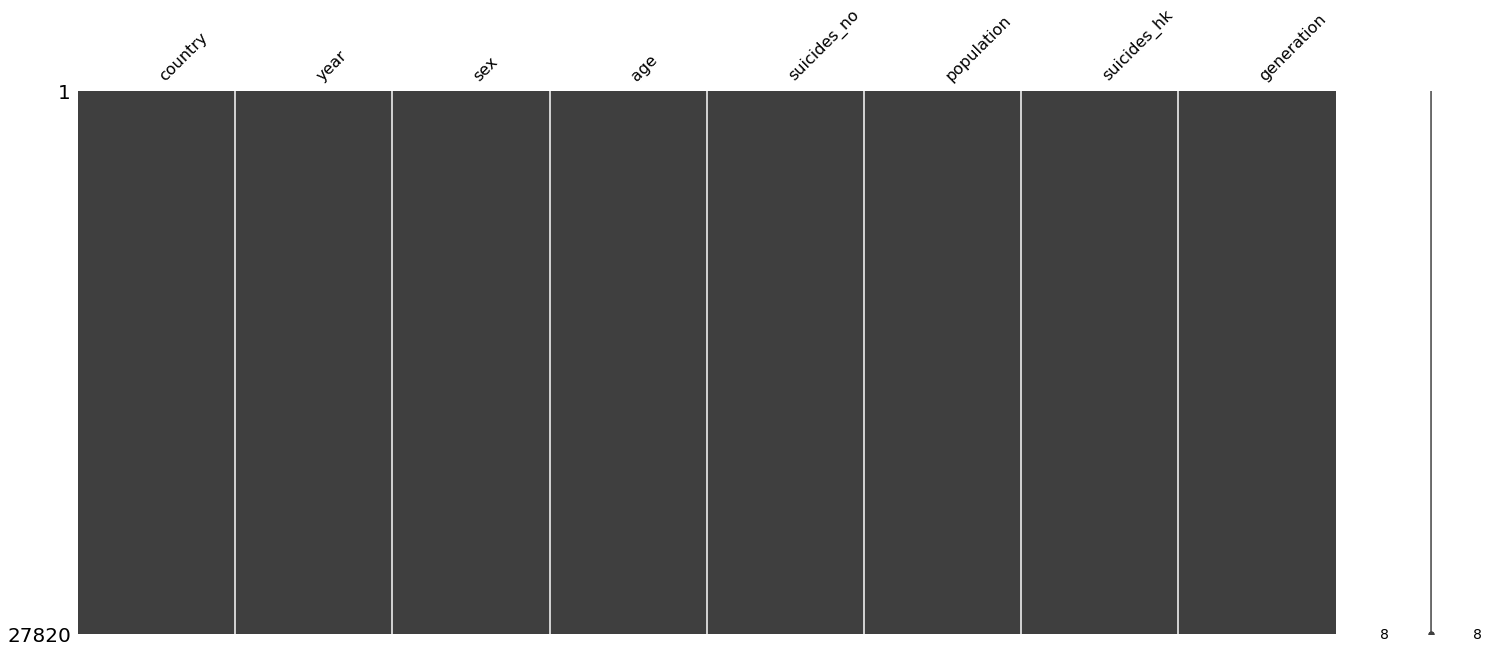

In [11]:
msno.matrix(df)

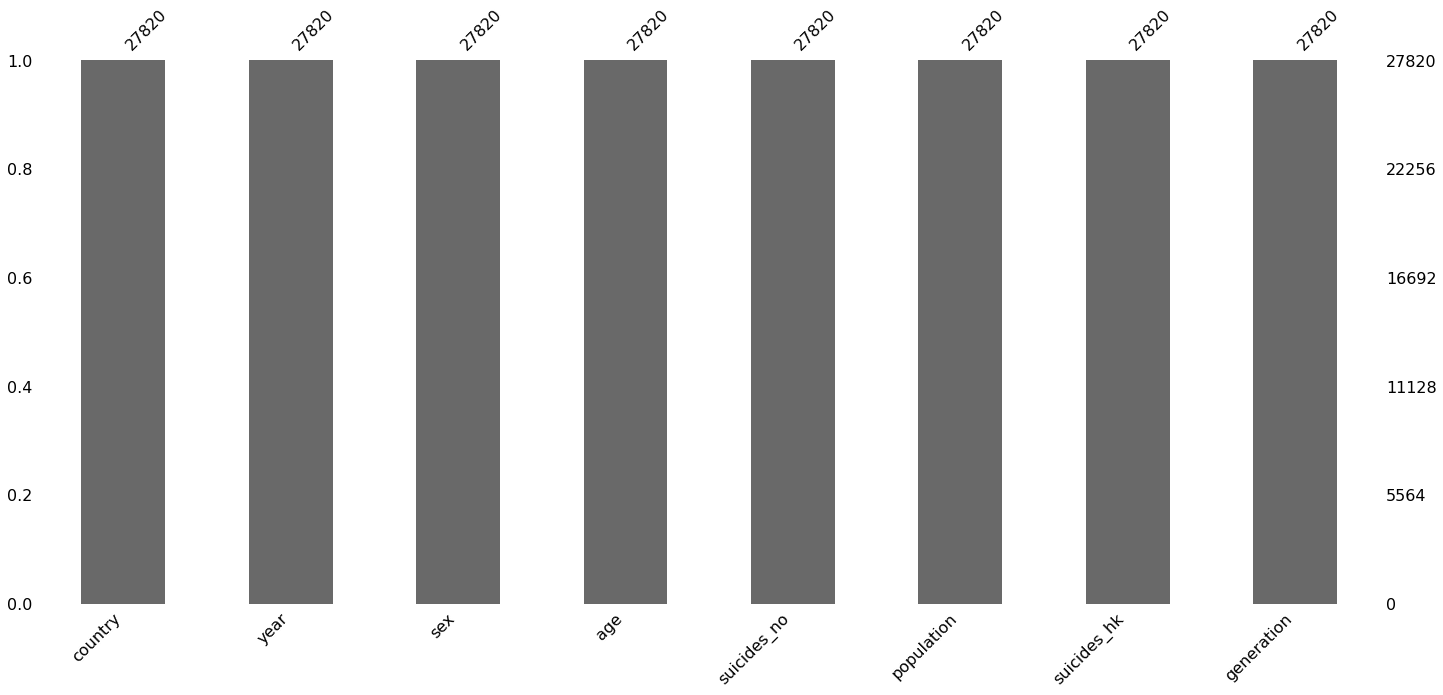

In [12]:
msno.bar(df)

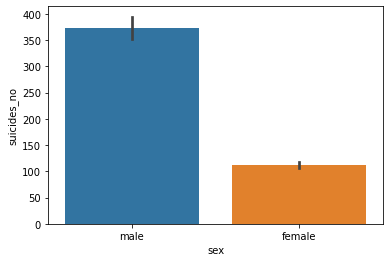

In [13]:
sns.barplot(x="sex",y='suicides_no',data=df)

From the Barplot, we can observe that more male have committed suicide than compared to the female. There are almost 375 male members whereas as there are more than 100 female members who committed suicide.

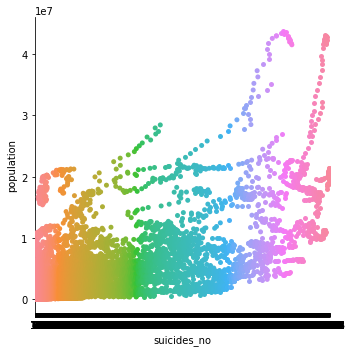

In [14]:
sns.catplot(x='suicides_no', y='population', data =df)

From the catplot, we can observe that As population increases, suicide number increases

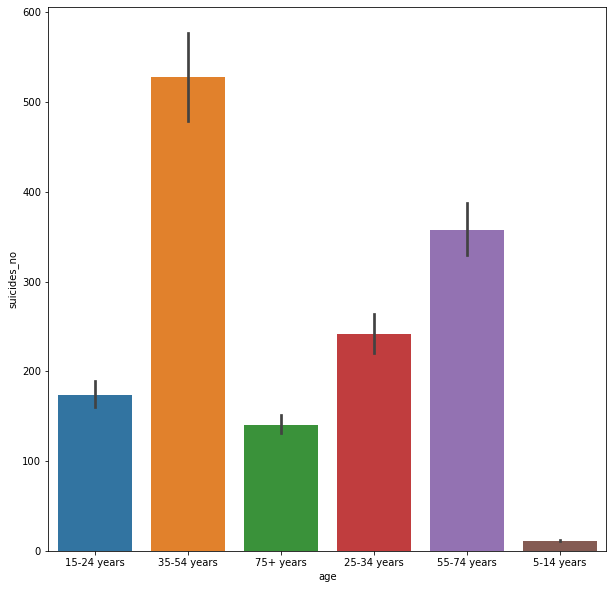

In [15]:
plt.figure(figsize=(10,10))
sns.barplot(x='age',y='suicides_no',data=df)

From the Barplot we can observe that citizen in the age range of 35-54 years are most prone to committing suicide. Then, next comes the age range of 55-74 years. Then it is continued by the age range of 25-34 years. Then 15-24 years. Then comes the age range of 5-14 years which is the least.

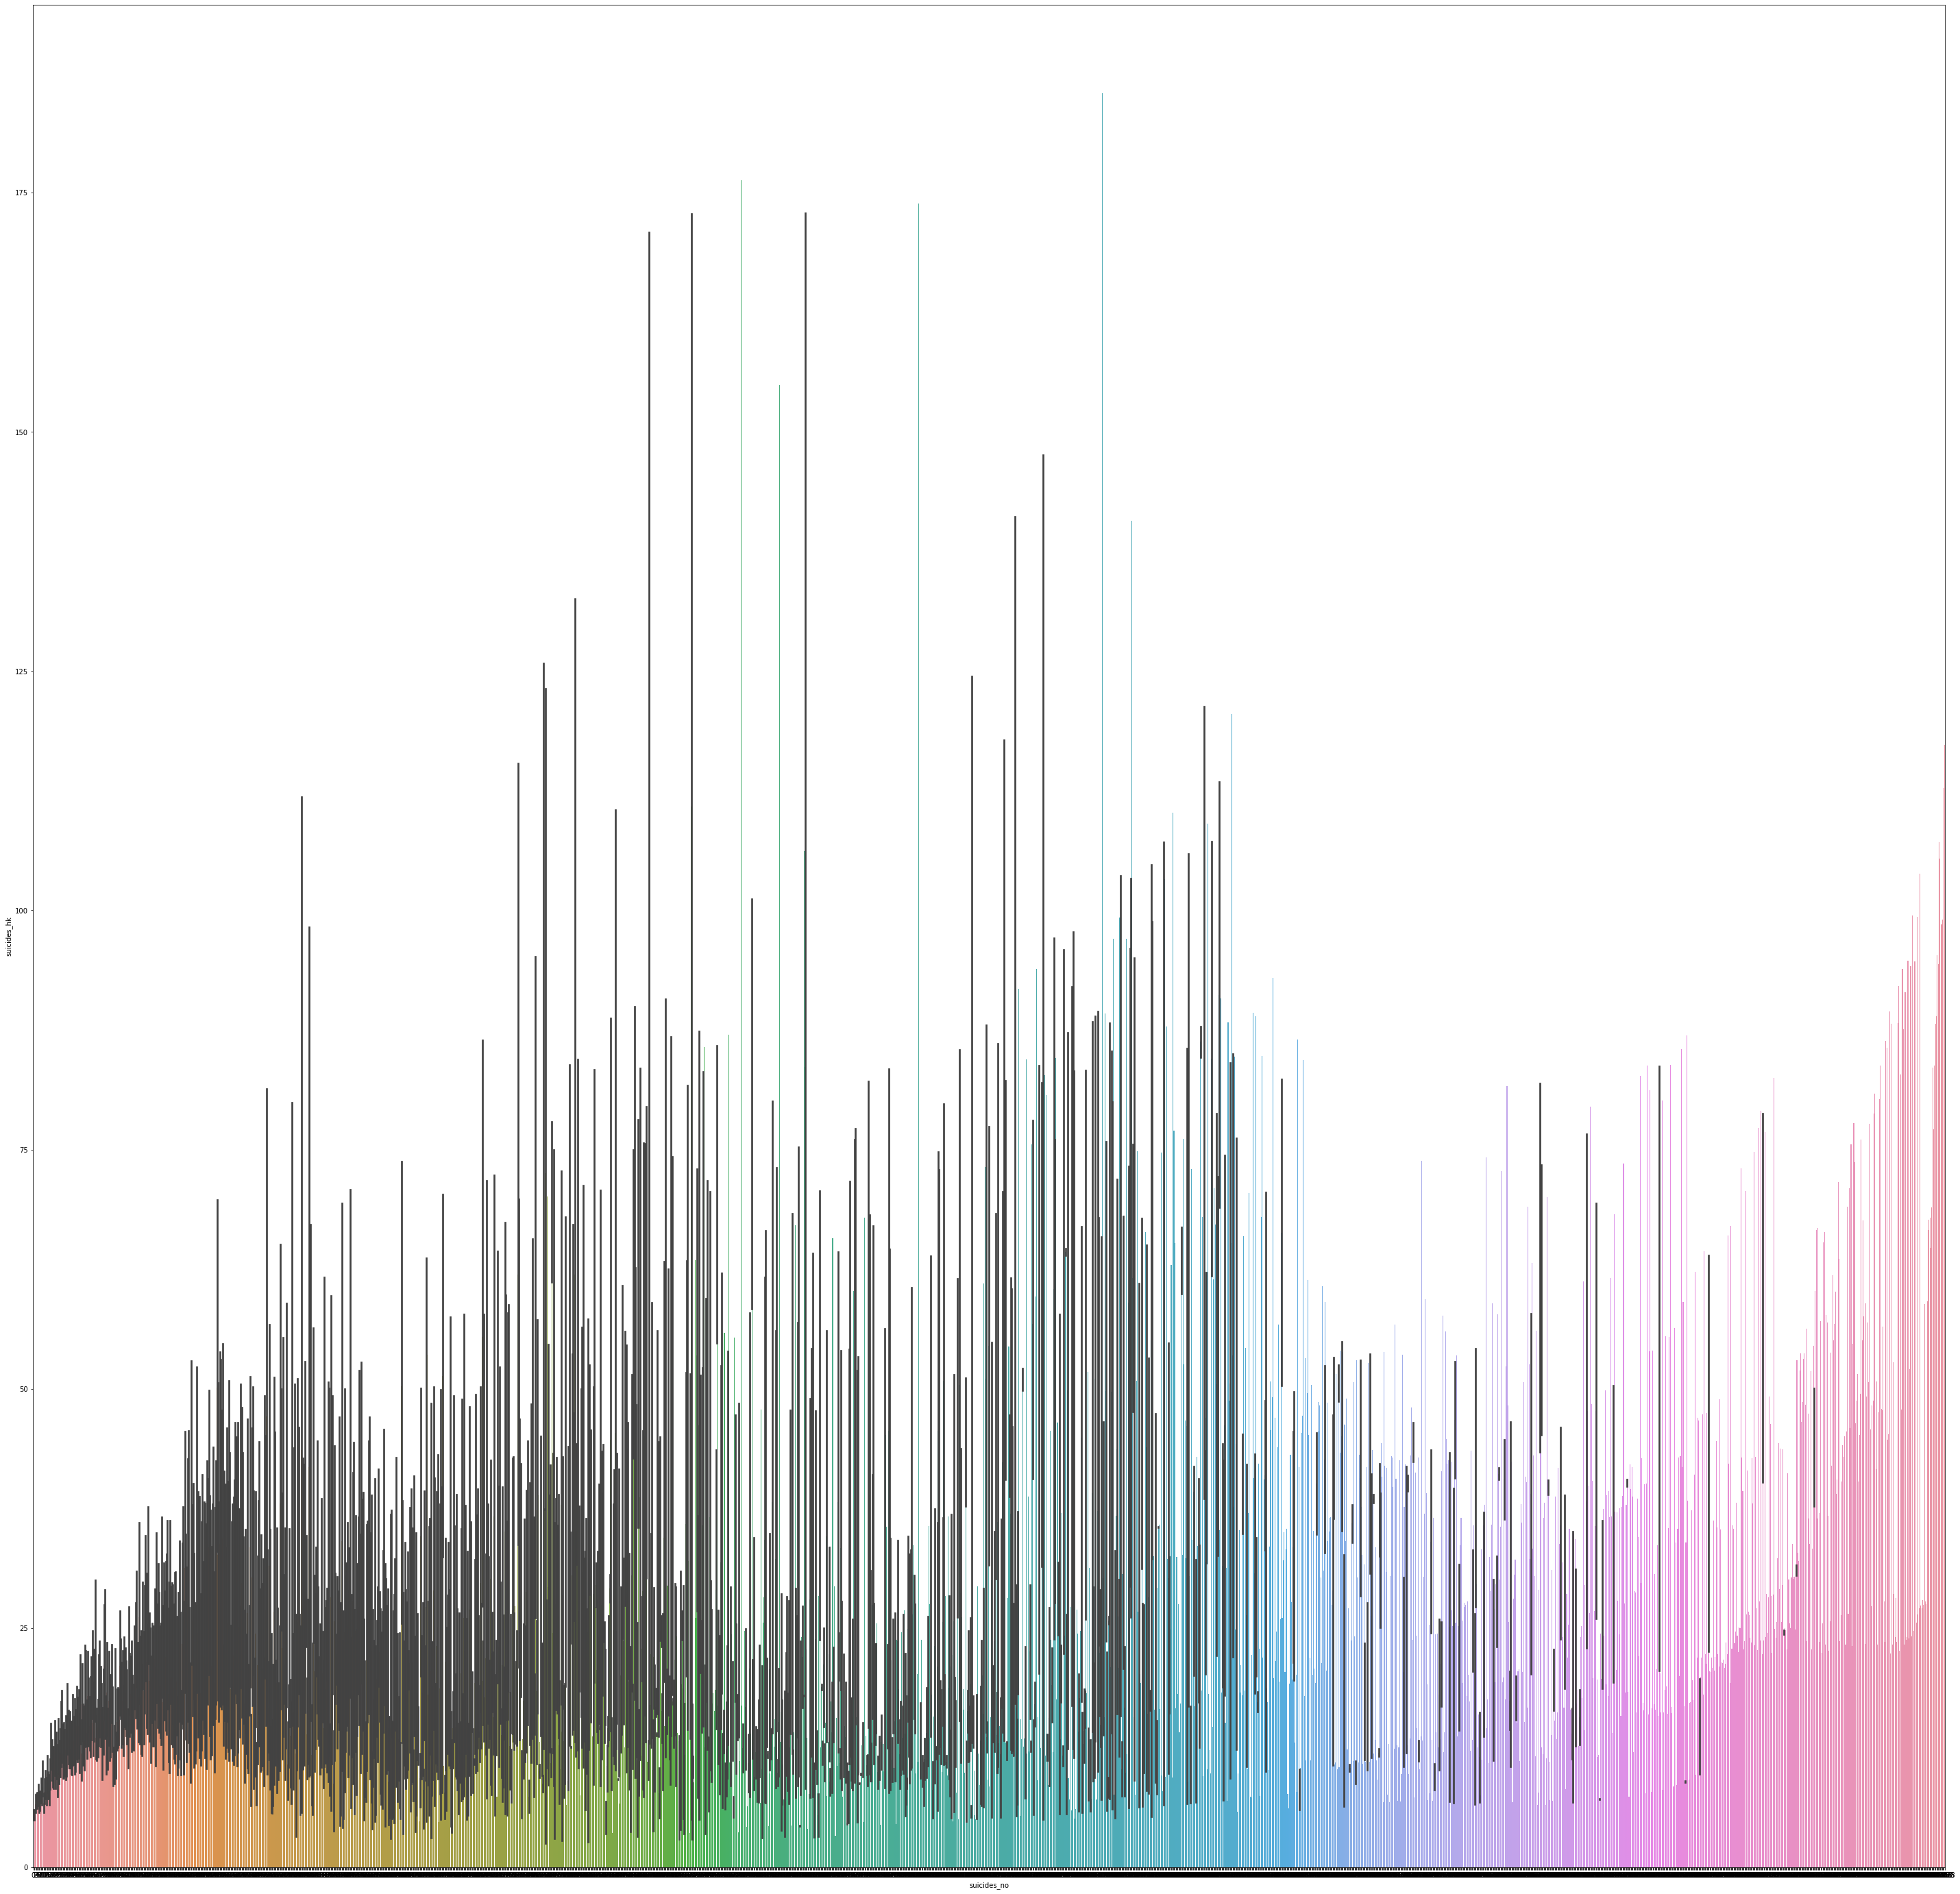

In [16]:
plt.figure(figsize=(50,50))
sns.barplot(y='suicides_hk',x='suicides_no',data=df)

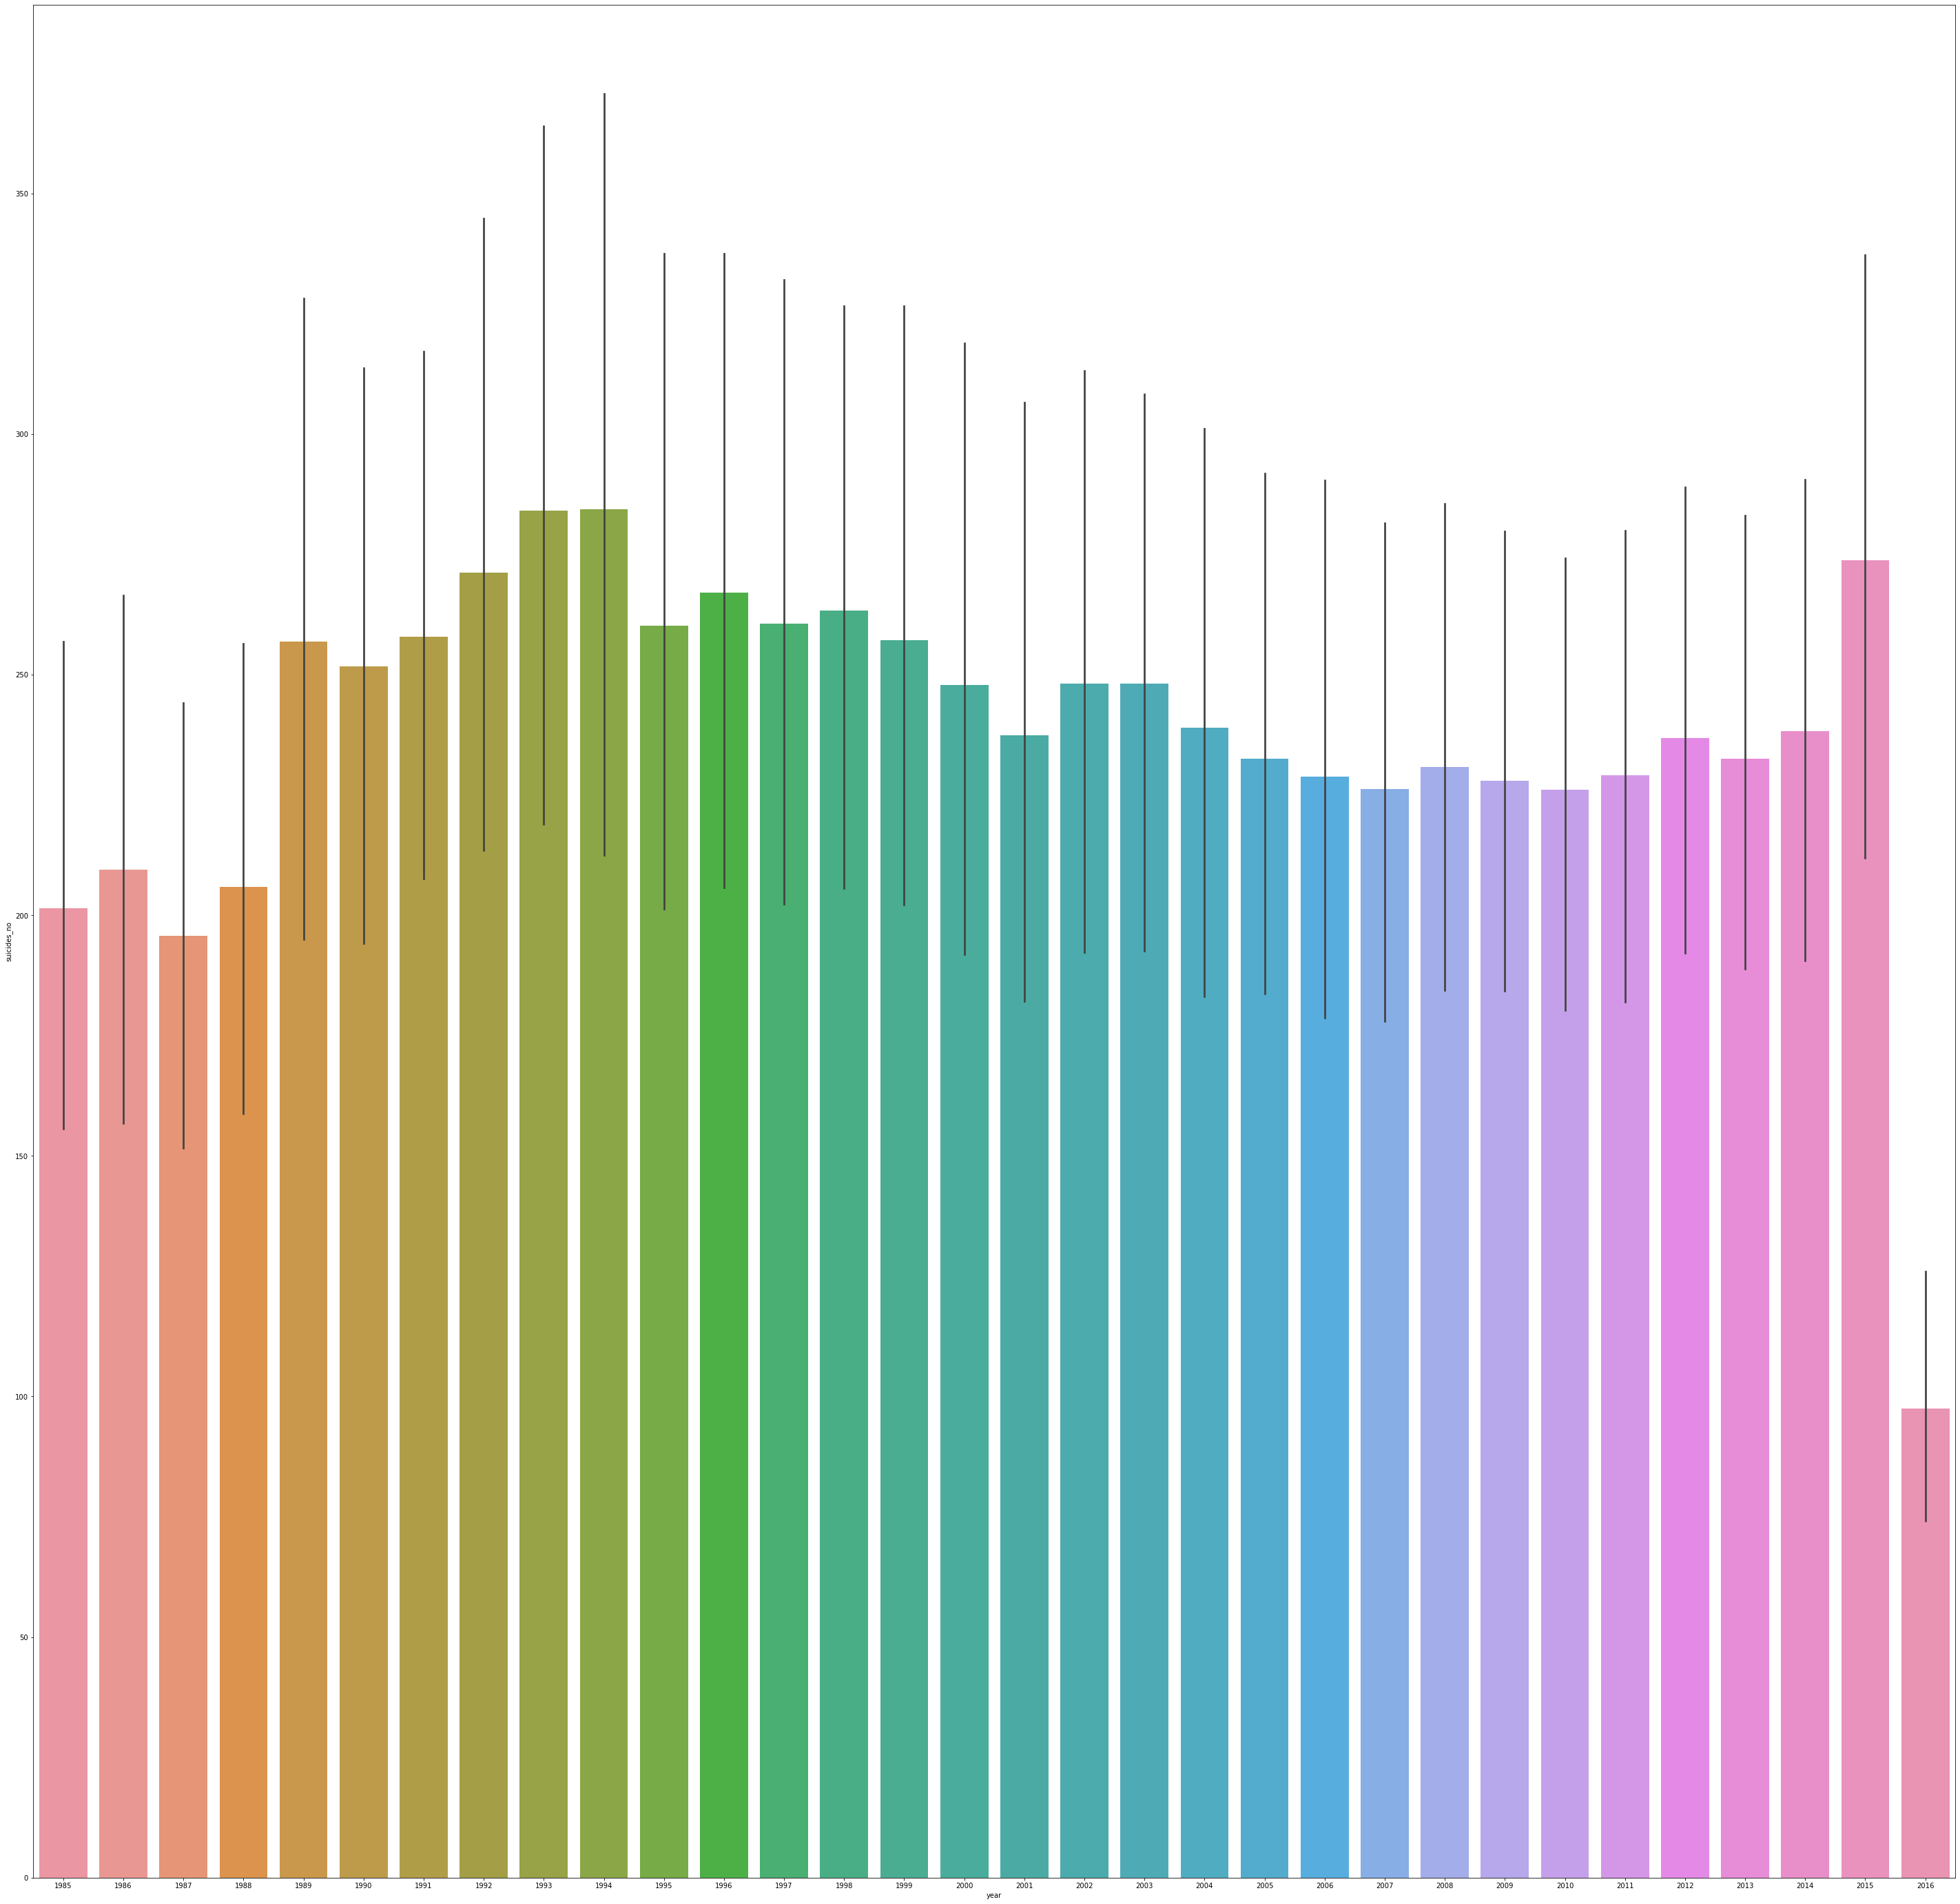

In [17]:
plt.figure(figsize=(50,50))
sns.barplot(x='year',y='suicides_no',data=df)

c:\users\srinaja\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\srinaja\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\srinaja\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\users\srinaja\miniconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAD2571128>,
      dtype=object)

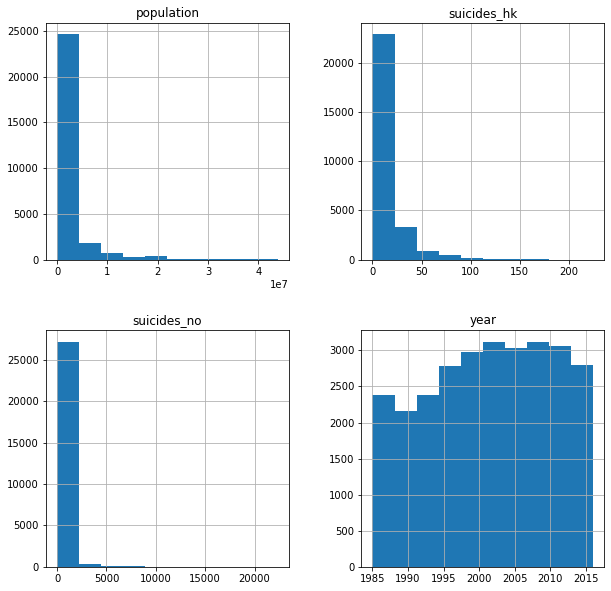

In [18]:
df.hist(figsize=(10,10))

In [19]:
df.dtypes

country         object
year             int64
sex             object
age             object
suicides_no      int64
population       int64
suicides_hk    float64
generation      object
dtype: object

In [20]:
#Converting the datatypesof some of the columns to convinient datatypes
df.year = df.year.astype(int)
df.suicides_no = df.suicides_no.astype(int)
df.population = df.population.astype(int)
df.suicides_hk = df.suicides_hk.astype(float)

In [21]:
df.dtypes

country         object
year             int32
sex             object
age             object
suicides_no      int32
population       int32
suicides_hk    float64
generation      object
dtype: object

### Data Encoding:

#### Dropping 'country','year' column:

In [22]:
df.drop(["country","year"],axis=1,inplace=True)
df

,sex,age,suicides_no,population,suicides_hk,generation
0,male,15-24 years,21,312900,6.71,Generation X
1,male,35-54 years,16,308000,5.19,Silent
2,female,15-24 years,14,289700,4.83,Generation X
3,male,75+ years,1,21800,4.59,G.I. Generation
4,male,25-34 years,9,274300,3.28,Boomers
...,...,...,...,...,...,...
27815,female,35-54 years,107,3620833,2.96,Generation X
27816,female,75+ years,9,348465,2.58,Silent
27817,male,5-14 years,60,2762158,2.17,Generation Z
27818,female,5-14 years,44,2631600,1.67,Generation Z


#### Concatenating the dataframe with dummies of 'age' column

In [23]:
df = pd.concat([df,pd.get_dummies(df.age,prefix="Age",drop_first=True)] ,axis=1)
df.head()

,sex,age,suicides_no,population,suicides_hk,generation,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years
0,male,15-24 years,21,312900,6.71,Generation X,0,0,0,0,0
1,male,35-54 years,16,308000,5.19,Silent,0,1,0,0,0
2,female,15-24 years,14,289700,4.83,Generation X,0,0,0,0,0
3,male,75+ years,1,21800,4.59,G.I. Generation,0,0,0,0,1
4,male,25-34 years,9,274300,3.28,Boomers,1,0,0,0,0


#### Concatenating the dataframe with dummies of 'generation' column

In [24]:
df["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [25]:
df = pd.concat([df,pd.get_dummies(df.generation,prefix="Gen",drop_first=True)]   ,axis=1)
df.head()

,sex,age,suicides_no,population,suicides_hk,generation,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years,Gen_G.I. Generation,Gen_Generation X,Gen_Generation Z,Gen_Millenials,Gen_Silent
0,male,15-24 years,21,312900,6.71,Generation X,0,0,0,0,0,0,1,0,0,0
1,male,35-54 years,16,308000,5.19,Silent,0,1,0,0,0,0,0,0,0,1
2,female,15-24 years,14,289700,4.83,Generation X,0,0,0,0,0,0,1,0,0,0
3,male,75+ years,1,21800,4.59,G.I. Generation,0,0,0,0,1,1,0,0,0,0
4,male,25-34 years,9,274300,3.28,Boomers,1,0,0,0,0,0,0,0,0,0


#### Label Encoding 'sex' column

In [26]:
df["sex"].value_counts()

male      13910
female    13910
Name: sex, dtype: int64

In [27]:
df['sex']=LabelEncoder().fit_transform(df.sex)
df.head()

,sex,age,suicides_no,population,suicides_hk,generation,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years,Gen_G.I. Generation,Gen_Generation X,Gen_Generation Z,Gen_Millenials,Gen_Silent
0,1,15-24 years,21,312900,6.71,Generation X,0,0,0,0,0,0,1,0,0,0
1,1,35-54 years,16,308000,5.19,Silent,0,1,0,0,0,0,0,0,0,1
2,0,15-24 years,14,289700,4.83,Generation X,0,0,0,0,0,0,1,0,0,0
3,1,75+ years,1,21800,4.59,G.I. Generation,0,0,0,0,1,1,0,0,0,0
4,1,25-34 years,9,274300,3.28,Boomers,1,0,0,0,0,0,0,0,0,0


### Now Dropping 'age,generation' column

In [28]:
df.drop(["age","generation"],axis=1,inplace=True)
df

,sex,suicides_no,population,suicides_hk,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years,Gen_G.I. Generation,Gen_Generation X,Gen_Generation Z,Gen_Millenials,Gen_Silent
0,1,21,312900,6.71,0,0,0,0,0,0,1,0,0,0
1,1,16,308000,5.19,0,1,0,0,0,0,0,0,0,1
2,0,14,289700,4.83,0,0,0,0,0,0,1,0,0,0
3,1,1,21800,4.59,0,0,0,0,1,1,0,0,0,0
4,1,9,274300,3.28,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0,107,3620833,2.96,0,1,0,0,0,0,1,0,0,0
27816,0,9,348465,2.58,0,0,0,0,1,0,0,0,0,1
27817,1,60,2762158,2.17,0,0,1,0,0,0,0,1,0,0
27818,0,44,2631600,1.67,0,0,1,0,0,0,0,1,0,0


In [29]:
df['Age_25-34 years'] = df['Age_25-34 years'].astype(int)
df['Age_35-54 years'] = df['Age_35-54 years'].astype(int)
df['Age_5-14 years'] = df['Age_5-14 years'].astype(int)
df['Age_55-74 years'] = df['Age_55-74 years'].astype(int)
df['Age_75+ years'] = df['Age_75+ years'].astype(int)
df['Gen_G.I. Generation'] = df['Gen_G.I. Generation'].astype(int)
df['Gen_Generation X'] = df['Gen_Generation X'].astype(int)
df['Gen_Generation Z'] = df['Gen_Generation Z'].astype(int)
df['Gen_Millenials'] = df['Gen_Millenials'].astype(int)
df['Gen_Silent'] = df['Gen_Silent'].astype(int)
df.suicides_no=df.suicides_no.astype(int)

In [30]:
df.population = df.population.astype(int)

In [31]:
df.dtypes

sex                      int32
suicides_no              int32
population               int32
suicides_hk            float64
Age_25-34 years          int32
Age_35-54 years          int32
Age_5-14 years           int32
Age_55-74 years          int32
Age_75+ years            int32
Gen_G.I. Generation      int32
Gen_Generation X         int32
Gen_Generation Z         int32
Gen_Millenials           int32
Gen_Silent               int32
dtype: object

### Splitting the data input and output data

In [32]:
X=df.drop(["suicides_no"],axis=1)
X

,sex,population,suicides_hk,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years,Gen_G.I. Generation,Gen_Generation X,Gen_Generation Z,Gen_Millenials,Gen_Silent
0,1,312900,6.71,0,0,0,0,0,0,1,0,0,0
1,1,308000,5.19,0,1,0,0,0,0,0,0,0,1
2,0,289700,4.83,0,0,0,0,0,0,1,0,0,0
3,1,21800,4.59,0,0,0,0,1,1,0,0,0,0
4,1,274300,3.28,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,0,3620833,2.96,0,1,0,0,0,0,1,0,0,0
27816,0,348465,2.58,0,0,0,0,1,0,0,0,0,1
27817,1,2762158,2.17,0,0,1,0,0,0,0,1,0,0
27818,0,2631600,1.67,0,0,1,0,0,0,0,1,0,0


In [33]:
y=df.suicides_no
y

0         21
1         16
2         14
3          1
4          9
        ... 
27815    107
27816      9
27817     60
27818     44
27819     21
Name: suicides_no, Length: 27820, dtype: int32

### Splitting the Input and Output  into training and testing sets:

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0 )

In [35]:
X_train

,sex,population,suicides_hk,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years,Gen_G.I. Generation,Gen_Generation X,Gen_Generation Z,Gen_Millenials,Gen_Silent
26864,1,19715000,21.69,0,0,0,0,0,0,1,0,0,0
26120,0,1920400,24.63,0,0,0,0,1,1,0,0,0,0
7876,1,1241310,8.14,0,1,0,0,0,0,0,0,0,0
2011,0,567665,5.64,1,0,0,0,0,0,1,0,0,0
21416,1,11467,17.44,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1,2873682,0.14,0,0,1,0,0,0,0,1,0,0
19648,1,665893,8.86,1,0,0,0,0,0,0,0,1,0
9845,0,4192492,18.22,0,0,0,0,1,0,0,0,0,1
10799,0,55825,0.00,0,0,0,0,1,1,0,0,0,0


In [36]:
X_test

,sex,population,suicides_hk,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years,Gen_G.I. Generation,Gen_Generation X,Gen_Generation Z,Gen_Millenials,Gen_Silent
5820,1,4391802,10.31,0,1,0,0,0,0,0,0,0,0
23242,1,313295,42.77,0,1,0,0,0,0,1,0,0,0
25643,0,4301203,0.88,0,0,0,1,0,0,0,0,0,1
24011,1,1488285,43.67,1,0,0,0,0,0,1,0,0,0
21706,1,11269,8.87,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20513,0,8209985,18.27,0,1,0,0,0,0,0,0,0,0
11907,1,22162,18.05,0,0,0,1,0,0,0,0,0,1
4857,1,813732,25.68,0,0,0,1,0,0,0,0,0,0
17793,0,152240,3.28,0,0,0,0,1,0,0,0,0,1


In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22256, 13)
(5564, 13)
(22256,)
(5564,)


# Model Building : 

## 1. Linear Regression: 

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # to consider it as a class give paranthesis
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred=lm.predict(X_train)
y_pred

array([2912.80483131,  289.98847866,  224.36274346, ...,  548.53240337,
       -319.27029888,  -45.06494951])

### Checking accuracy of training data using r2_score:

In [40]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)

0.4682965663756704

### Now predicting and calculating r2_score for testing data:

In [68]:
y_predtest=lm.predict(X_test)
y_predtest

array([ 701.49618951,  543.8402748 ,  453.86245958, ...,  382.13329004,
       -233.57055147,  -17.78822439])

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predtest)

0.5210149348104174

## 2. KNN Regressor :

### Scaling the Data:

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.99363992,  4.55345772,  0.46122516, ..., -0.23704073,
        -0.51475887, -0.54696001],
       [-1.00640079,  0.01998544,  0.61549062, ..., -0.23704073,
        -0.51475887, -0.54696001],
       [ 0.99363992, -0.15302411, -0.2497602 , ..., -0.23704073,
        -0.51475887, -0.54696001],
       ...,
       [-1.00640079,  0.59883891,  0.27914994, ..., -0.23704073,
        -0.51475887,  1.82828722],
       [-1.00640079, -0.45504626, -0.67687613, ..., -0.23704073,
        -0.51475887, -0.54696001],
       [ 0.99363992, -0.44448287, -0.29908317, ..., -0.23704073,
        -0.51475887, -0.54696001]])

In [42]:
# scaling for train data we use fit_transform 
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),
                            columns=X_train.columns)
scaled_X_train

# scaling for test data and for test we should only use transform
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_test=pd.DataFrame(scaler.transform(X_test),
                            columns=X_train.columns)
scaled_X_test

,sex,population,suicides_hk,Age_25-34 years,Age_35-54 years,Age_5-14 years,Age_55-74 years,Age_75+ years,Gen_G.I. Generation,Gen_Generation X,Gen_Generation Z,Gen_Millenials,Gen_Silent
0,0.993640,0.649616,-0.135898,-0.448563,2.251503,-0.444293,-0.446755,-0.453109,-0.333699,-0.546059,-0.237041,-0.514759,-0.546960
1,0.993640,-0.389451,1.567319,-0.448563,2.251503,-0.444293,-0.446755,-0.453109,-0.333699,1.831305,-0.237041,-0.514759,-0.546960
2,-1.006401,0.626535,-0.630701,-0.448563,-0.444148,-0.444293,2.238361,-0.453109,-0.333699,-0.546059,-0.237041,-0.514759,1.828287
3,0.993640,-0.090103,1.614543,2.229340,-0.444148,-0.444293,-0.446755,-0.453109,-0.333699,1.831305,-0.237041,-0.514759,-0.546960
4,0.993640,-0.466398,-0.211456,-0.448563,-0.444148,-0.444293,-0.446755,-0.453109,-0.333699,1.831305,-0.237041,-0.514759,-0.546960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5559,-1.006401,1.622363,0.281774,-0.448563,2.251503,-0.444293,-0.446755,-0.453109,-0.333699,-0.546059,-0.237041,-0.514759,-0.546960
5560,0.993640,-0.463622,0.270230,-0.448563,-0.444148,-0.444293,2.238361,-0.453109,-0.333699,-0.546059,-0.237041,-0.514759,1.828287
5561,0.993640,-0.261957,0.670585,-0.448563,-0.444148,-0.444293,2.238361,-0.453109,-0.333699,-0.546059,-0.237041,-0.514759,-0.546960
5562,-1.006401,-0.430483,-0.504770,-0.448563,-0.444148,-0.444293,-0.446755,2.206977,-0.333699,-0.546059,-0.237041,-0.514759,1.828287


### Model Building for KNN :

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3,metric="euclidean")
# applying on the the data set
knn.fit(scaled_X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [44]:
# predictions on the data
# predict function
# syntax objectname.predict(input)
y_train_predict=knn.predict(scaled_X_train)
y_train_predict

array([4234.33333333,  466.66666667,  102.66666667, ...,  761.        ,
          0.        ,    5.33333333])

### Calculating the metrics for training data:

## Error Metrics:
 - MAE - Mean Absolute Error
 - MSE - Mean Squared Error
 - RMSE - Root Mean Squared Error

In [45]:
print('R^2:', r2_score(y_train,y_train_predict))
print('Adjusted R^2:', 1- (1-r2_score(y_train, y_train_predict))*(len(scaled_X_train)-1)/
                                  (len(scaled_X_train)-scaled_X_train.shape[1]-1))
print("MAE",mean_absolute_error(y_train,y_train_predict))

print("MSE",mean_squared_error(y_train,y_train_predict))

print("RMSE",np.sqrt(mean_squared_error(y_train,y_train_predict)))

R^2: 0.997424078922969
Adjusted R^2: 0.9974225733490997
MAE 10.607461658279416
MSE 2239.6723829778743
RMSE 47.325177051732986


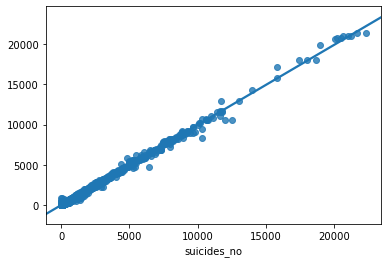

In [46]:
## regplot(y_train --> actual values adn y_train_pred )
sns.regplot(y_train,y_train_predict)

### Now Predicting on testing data:

In [47]:
## Test the model on testing data
y_test_predict =knn.predict(scaled_X_test) # test data-- unseen data
y_test_predict

array([450.66666667, 118.66666667,  45.33333333, ..., 211.66666667,
         5.        ,   8.33333333])

### Calculating the metrics for Testing data: 

In [48]:
## we need to compare the actual values(y_test) and predicted values(y_test_pred)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print('R^2:', r2_score(y_test,y_test_predict))

print('Adjusted R^2:', 1- (1-r2_score(y_test, y_test_predict))*(len(scaled_X_test)-1)/
                                  (len(scaled_X_test)-scaled_X_test.shape[1]-1))

print("MAE",mean_absolute_error(y_test,y_test_predict))

print("MSE",mean_squared_error(y_test,y_test_predict))

print("RMSE",np.sqrt(mean_squared_error(y_test,y_test_predict)))

R^2: 0.9901550415238197
Adjusted R^2: 0.9901319812607223
MAE 17.510603882099208
MSE 5811.543553798228
RMSE 76.23348053052692


### Choosing which K value will give more accuracy score:

In [49]:
scores=[]
# checking for optimum k value
# building the model with multiple k values
for k in range(1,20):
    knn_model=KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    pred_test=knn_model.predict(scaled_X_test)
    scores.append(r2_score(y_test,pred_test))
scores

[0.9952600229474291,
 0.9949236985329581,
 0.9901550415238197,
 0.9869422611280094,
 0.9832721545031687,
 0.9786178978078205,
 0.9719673331113022,
 0.9694582993086969,
 0.9622053533832136,
 0.9565847475681516,
 0.9560373574604122,
 0.9528062213082739,
 0.9497748707712066,
 0.9440359997611577,
 0.9382935614107898,
 0.9329280190402246,
 0.9272256470134019,
 0.9214829377799609,
 0.914574051345229]

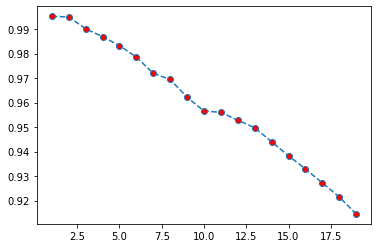

In [50]:
# plot of k-values and scores
plt.plot(range(1,20),scores,marker='o',markerfacecolor="r",linestyle="--")

In [51]:
# optimun k value is 2
final_model=KNeighborsRegressor(n_neighbors=2,metric="euclidean")
final_model.fit(scaled_X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [52]:
# predicting on the training data
final_train_predict=final_model.predict(scaled_X_train)
final_train_predict

array([4271.5,  474.5,  104.5, ...,  768.5,    0. ,    5.5])

### Calculating the metrics for training data of Final Model : 

In [53]:
print('R^2:', r2_score(y_train,final_train_predict))
print('Adjusted R^2:', 1- (1-r2_score(y_train, final_train_predict))*(len(scaled_X_train)-1)/
                                  (len(scaled_X_train)-scaled_X_train.shape[1]-1))

R^2: 0.9987914456393199
Adjusted R^2: 0.9987907392636932


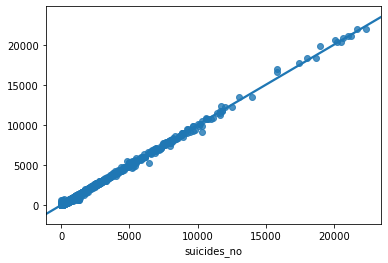

In [54]:
## regplot(y_train --> actual values adn y_train_pred )
sns.regplot(y_train,final_train_predict)

In [55]:
## Test the model on testing data
final_test_predict =final_model.predict(scaled_X_test) # test data-- unseen data
final_test_predict

array([489. , 117.5,  45. , ..., 239. ,   5. ,   8.5])

### Calculating the metrics for testing data of Final Model :

In [56]:
## we need to compare the actual values(y_test) and predicted values(y_test_pred)
print('R^2:', r2_score(y_test,final_test_predict))

print('Adjusted R^2:', 1- (1-r2_score(y_test, final_test_predict))*(len(scaled_X_test)-1)/
                                  (len(scaled_X_test)-scaled_X_test.shape[1]-1))

print("MAE",mean_absolute_error(y_test,final_test_predict))

print("MSE",mean_squared_error(y_test,final_test_predict))

print("RMSE",np.sqrt(mean_squared_error(y_test,final_test_predict)))

R^2: 0.9949236985329581
Adjusted R^2: 0.9949118080970893
MAE 14.634615384615385
MSE 2996.5740474478794
RMSE 54.74097229176588


## 3. Random Forest Regressor:

In [57]:
#import,initialize,fit

#importing
from sklearn.ensemble import RandomForestRegressor

#create an object for this
rfr = RandomForestRegressor(n_estimators=40)
#n_estimators-> Builds 40 dtrees

#Fit the random forest classifier to the training data
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
y_pred_train = rfr.predict(X_train)

### Calculating r2_score for training data:

In [59]:
r2_score(y_train,y_pred_train)

0.9996278524822058

In [60]:
y_pred_test = rfr.predict(X_test)

### Calculating r2_score for testing data:

In [61]:
r2_score(y_test,y_pred_test)

0.9986249859145168

### DIDN'T USE ANY GridSearchCV and HyperParameter Tuning because the r2 score is already 99.8%

## Visualizing the every model's r2_scores.

### For Train r2_score

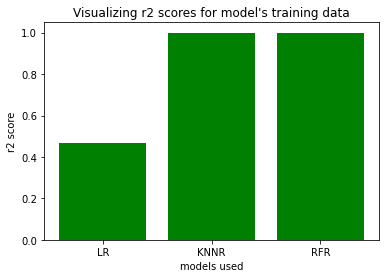

In [71]:
model=['LR','KNNR','RFR']
r2 = [0.4682965663756704,0.9987914456393199,0.9996278524822058]
plt.bar(model,r2,color='green')
plt.title("Visualizing r2 scores for model's training data")
plt.xlabel('models used')
plt.ylabel('r2 score')
plt.show()

### For Testing r2_score:

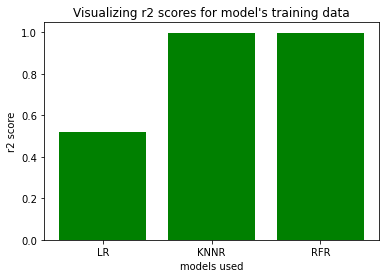

In [72]:
model=['LR','KNNR','RFR']
r2 = [0.5210149348104174,0.9949236985329581,0.9986249859145168]
plt.bar(model,r2,color='green')
plt.title("Visualizing r2 scores for model's training data")
plt.xlabel('models used')
plt.ylabel('r2 score')
plt.show()

### Predicting using Random Forest Because it gave the highest r2_score:

#### Using dataframe values:

In [62]:
print(rfr.predict([[0,278800,2.15,0,1,0,0,0,0,0,0,0,1]]))

[6.]


In [63]:
print(rfr.predict([[1,21800,4.59,0,0,0,0,1,1,0,0,0,0]]))

[1.]


In [64]:
print(rfr.predict([[0,289700,4.83,0,0,0,0,0,0,1,0,0,0]]))

[14.025]


#### Using Random values which are not in the dataframe:

In [65]:
print(rfr.predict([[1,20645,11.0,0,1,0,0,0,0,0,0,0,1]]))

[2.25]


In [66]:
print(rfr.predict([[0,21945,19.0,0,0,1,0,0,0,1,0,0,0]]))

[4.375]


In [67]:
print(rfr.predict([[1,22095,9.0,0,0,1,0,0,0,0,1,0,0]]))

[2.]
